<a href="https://colab.research.google.com/github/rhi-batstone/IntroPsychStats/blob/main/lm_books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='http://drive.google.com/uc?export=view&id=1fDQUuaVfjkpHK2MpaeIQBe4UBME7l4SP' width=500>



#<font color='darkorange'>Exploritory Data Analysis: book ratings! </font>

In this notebook we'll do some exploratory data analysis!


### 1. Load in the data

Lets load in some packages. These have functions that other people have made, and will hopefully make our lives a lot easier!

In [ ]:
install.packages("jtools")
install.packages("ggstance")
library(jtools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘pander’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




To read more about the book dataset:
> [Amazon top 50 books](https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019)

In [ ]:
#Work with the boston house prices
df_EDA <- read.csv("https://raw.githubusercontent.com/tbonne/IntroPychStats/main/data/bestsellers_with_categories.csv", header = T)

#let's take a look at the data
head(df_EDA)

,Name,Author,Rating,Reviews,Price,Year,Genre
,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<chr>
1,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
2,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
3,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
4,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
5,"5,000 Awesome Facts (About Everything!) (National Geographic Kids)",National Geographic Kids,4.8,7665,12,2019,Non Fiction
6,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction


Let's ask the following questions in the lab:

> Q1: Is there an association between the genre and the rating of books?

> Q2: Is there an association between the price of the book and the rating? What about year of publication? Or the number of reviews recived?

> Q3: Which variable has more of an impact on predicted rating? Is it price, year, or number of reviews?


### 2. Visualize our data

Then let's plot a scatterplot (feel free to plot a few here, it is always a good idea to explore your data before modeling!). Here we will choose:
> What we'd like to predict and put it on the y-axis.

> What we'd like to use to help make those predictions and put it on the x-axis.

> The choice of these variables should follow from the question you're asking above!


**Histogram**

Histograms are a great way to see how a numeric variable is distributed. Try taking a look at how ratings are distributed? Which ratings are most common?
  
<font color = "darkred"> (?) for the question mark below you should replace it with the column name that you'd like to use for the histogram.  </font>

In [ ]:
hist(df_EDA$?)

ERROR: ignored

**Scatterplot**

Scatterplots are a great way to explore the relationships between two numeric variables. Let's look at price and ratings!
  
<font color = "darkred"> (?) for the first question mark below you should replace it with the column name that you'd like to use to make predictions. For the second question mark you should replace it with the variable you'd like to predict. </font>

In [ ]:
plot(x=df_EDA$?,y=df_EDA$?)

**Boxplot**

Boxplots are a great way to see how a numeric variable is distributed within certain categories. Let's look at how ratings change with the genre of book.
   
<font color = "darkred"> Replace the first question mark with the categorical variable, and the second question mark with the variable you'd like to predict. </font>

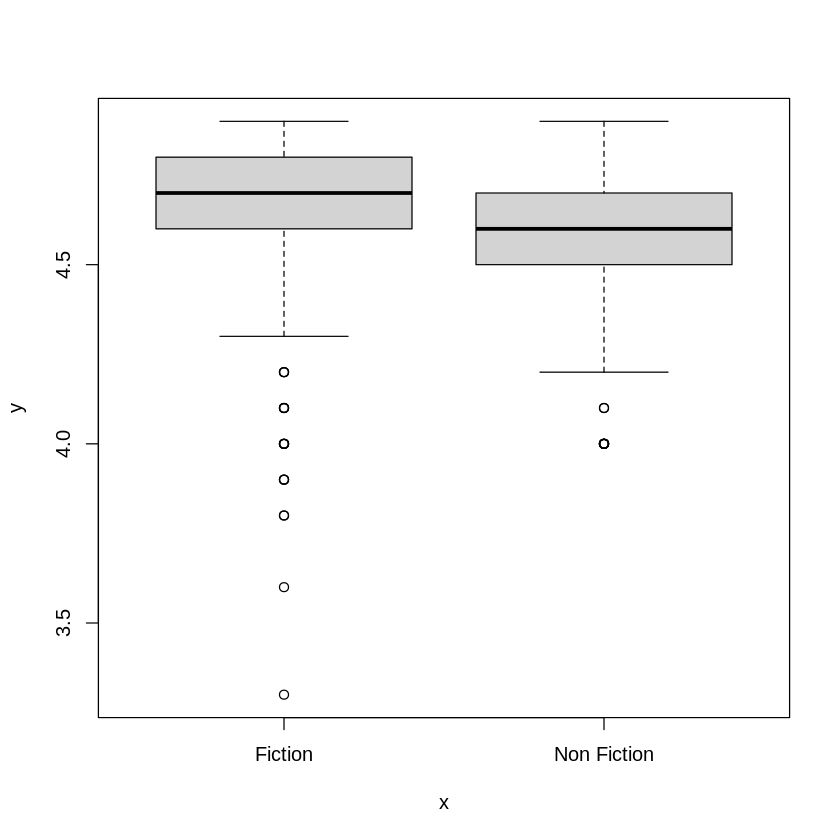

In [ ]:
plot(x=factor(df_EDA$Genre),y=df_EDA$Rating)

### 3. Define and fit a model

Now we can speficy the model we'd like to fit.
> Remember, here we use the formula: "what we'd like to predict" ~ "what we'd like to use to help make those predictions."

Outcome (what we'd like to predict):

> Rating

Predictors (what we'd like to use to make predictions):

> Genre

> Reviews

> Price

> Year
  

<font color = "darkred"> (?) for the question mark below you should replace it with the formula that will help you answer your question. </font>

In [ ]:
#fit a linear model
model_EDA <- lm(Rating ~ Genre + Reviews + Price + Year, data=df_EDA)


This bit of code then use our inputs to find the best fit linear equation for:
> $y \sim Normal(\mu, \sigma) $

> $\mu = a + b_1 * x_1 + b_2*x_2 + ...$


Let's use the summ function to tell us what values of a and b it found for the best fit line.
> We'll calculate our 95% confidence interval here (i.e., confint=TRUE)

> We'll also scale our numeric varibables to make them easier to compare (i.e., scale=TRUE)

In [ ]:
#What does the best fit model look like?
summ(model_EDA, confint=TRUE, scale = TRUE)

MODEL INFO:
Observations: 550
Dependent Variable: Rating
Type: OLS linear regression 

MODEL FIT:
F(4,545) = 13.69, p = 0.00
R² = 0.09
Adj. R² = 0.08 

Standard errors: OLS
--------------------------------------------------------------
                          Est.    2.5%   97.5%   t val.      p
---------------------- ------- ------- ------- -------- ------
(Intercept)               4.65    4.63    4.68   320.41   0.00
GenreNon Fiction         -0.06   -0.10   -0.03    -3.24   0.00
Reviews                  -0.03   -0.05   -0.01    -2.70   0.01
Price                    -0.02   -0.04    0.00    -1.89   0.06
Year                      0.06    0.04    0.08     6.15   0.00
--------------------------------------------------------------

Continuous predictors are mean-centered and scaled by 1 s.d. The outcome variable remains in its original units.

We can see from this output that the model is pretty certain that the association/difference in the population is somewhere between ? and ?.
> Those are the range of population values that are compatible with our sample!

> We can also get a sense of how well your model predictions reflect the observed values using R2.

### 4. Visualize the results

Let's take a look at the estimates in our summary table a little more visually.
> the points in the plot below are the model estimates (i.e., associations/differences).

> The horizontal lines show us the 95% confidence intervals of those estimates.

> If scale = TRUE we can also see what associations/differences are contributing the most in making predictions.

Registered S3 methods overwritten by 'broom':
  method            from  
  tidy.glht         jtools
  tidy.summary.glht jtools

Loading required namespace: broom.mixed



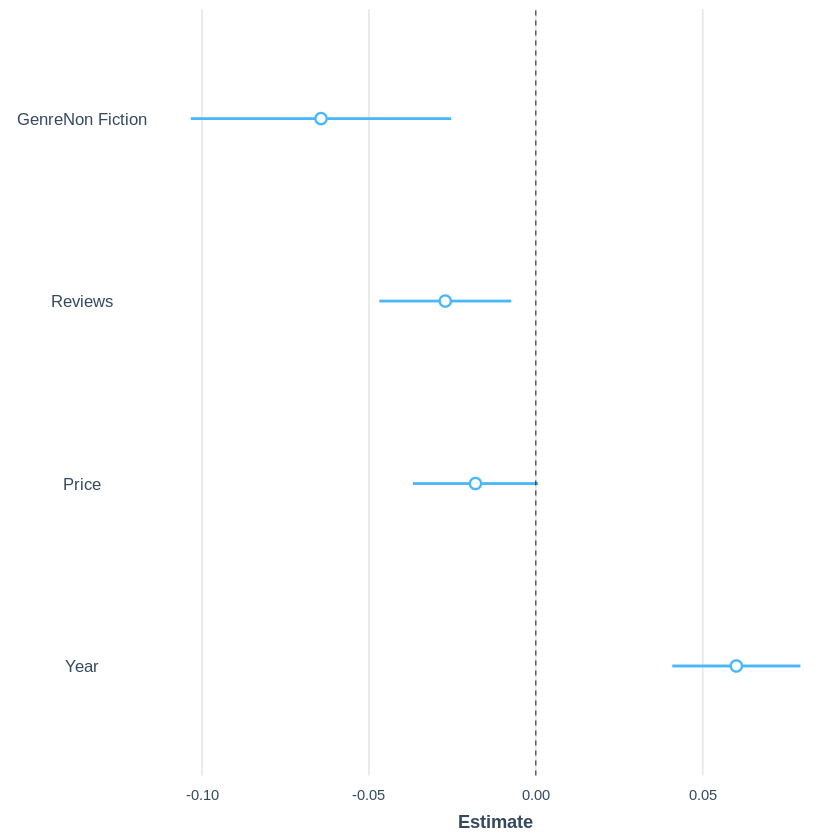

In [ ]:
#plot the estimates of the slopes
plot_summs(model_EDA, scale=TRUE)

Let's take a look at the regression line a little more visually.
> The plot below shows us the predicted line or difference

> This can be plotted for each variable that you used to help make predictions

> This plot can help you better understand the relationship between one of your predictor variables and the outcome you are trying to predict.

<font color = "darkred"> (?) for the question mark below you should replace it with a variable that you used to make your predictions. </font>

In [ ]:
#plot the difference between genres
effect_plot(model_EDA, pred = ?, interval = TRUE, plot.points = FALSE)

ERROR: ignored

In [ ]:
#plot the change in rating due to price
effect_plot(model_EDA, pred = ?, interval = TRUE, plot.points = TRUE)

In [ ]:
#plot the change in ratings due to the number of reviews
effect_plot(model_EDA, pred = ?, interval = TRUE, plot.points = FALSE)

### 5. Checking assumptions

**Assumption 1**

Let's check the assumption that the errors (residuals) are normally distributed.

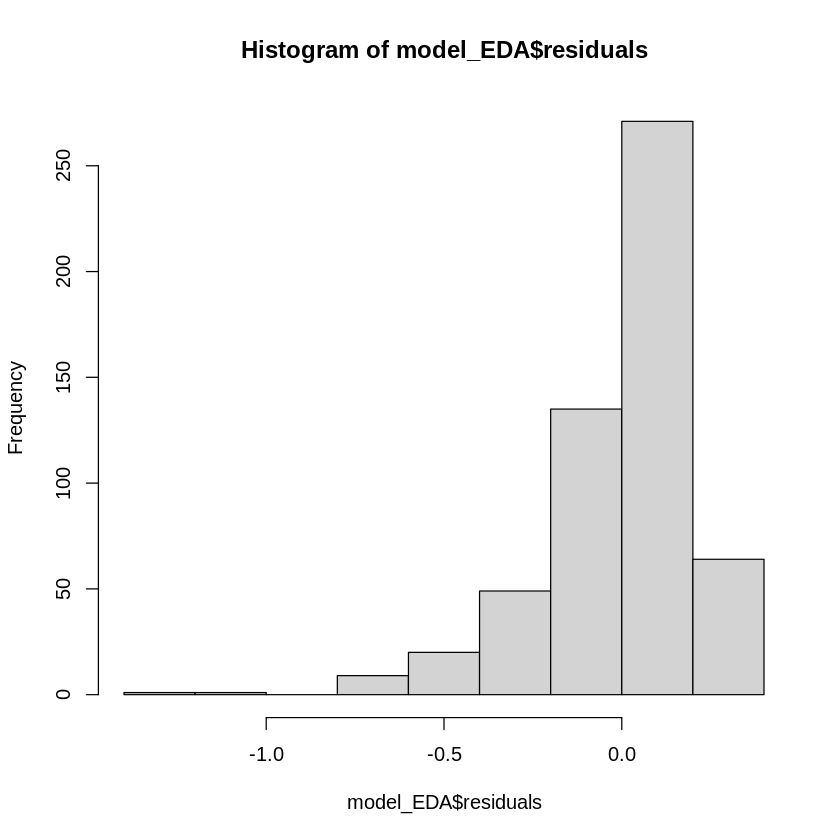

In [ ]:
hist(model_EDA$residuals)

The above plot is just like the histograms we've looked at in the past. Now we are looking at how errors are distributed.

> If the errors do not look to have many small errors and few large errors (both positive and negative) then a normal distribution might not be the best model of the data. We might also be missing an important variable...

**Assumption 2** - no patterns in the residuals
  
Let's check the assumption that the variance in the errors is constant.

In [ ]:
plot(y=model_EDA$residuals, x=model_EDA$fitted.values)
abline(h = 0, lty=3)

The above plot shows you all the errors (residuals) for each value that the model predicts. Ideally, we'd like to see errors evenly distributed around 0 (i.e., the dashed line).

> If there is more variance in the errors for some prediction values then this means the model is better at predicting some values than others.

**Assumption 2** - no patterns in the residuals
   
Let's check the assumption that the relationship between your variables is linear (i.e., that a straight line and not a curvy line fit the data best). We can see this intuatively in the origianl scatter plot, or we can look at the residuals!

In [ ]:
plot(y=model_EDA$residuals, x=model_EDA$fitted.values)
abline(h = 0, lty=3)

The plot above is just the line fit to the scatterplot we saw before. Intuatively you can check to see if the straight line fits the data, or if a curvy line might fit better.

There are two things to keep in mind when checking the assumptions of the linear regression.

> The first is that the assumptions do not need to be perfect to give you a resonable estimate.

> The second is that often the way the model fails can help you build a better model.

### 6. Interpret and communicate the results

From the results above what can you answer the question you posed in section 1?  
> What is the association between the variables that you tested?

>> <font color="darkblue">E.g., I found a positive association between the number of rooms and the price of a house (4.08, 95%CI: 1.82, 6.34).</font>

> What does the confidence interval tell you about how certain you are in the sign and magnitude of those association?

>> <font color="darkblue">E.g., While the results suggest the sign of the association between number of rooms and price is positive, it is relativelty uncertain about the magnitude (95%CI: 1.82, 6.34).</font>

> How "good" are your model predictions?

>> <font color="darkblue">E.g., The model was able to predict house prices with an r2 of 0.50.</font>

> How closely does your model meet the model assumptions?

>> <font color="darkblue">The model residuals are approximately normally distributed (e.g., point to your histogram). A plot of the residuals vs. predicted suggest some maximum residual values depending on the predicted value (e.g., point to your residual vs. fitted plot).</font>

# Moodle quiz

Once you've gone through this lab, go to Moodle and answer a short quiz.